In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
data_uci = pd.read_csv('C:\AD_TASK3\Regressionlogistic\heart_cleveland_upload.csv')
data_uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
data_uci.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [5]:
data_uci.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

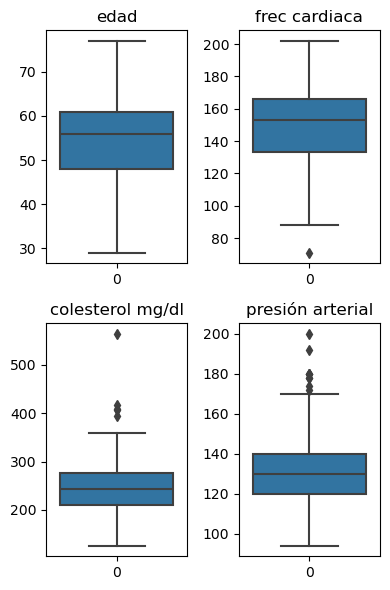

In [30]:
#Se realiza deteccion de datos atípicos
fig, axs = plt.subplots(2,2, figsize = (4,6))
plt1 = sns.boxplot(data_uci['age'], ax = axs[0,0])
plt2 = sns.boxplot(data_uci['thalach'], ax = axs[0,1])
plt3 = sns.boxplot(data_uci['chol'], ax = axs[1,0])
plt4 = sns.boxplot(data_uci['trestbps'], ax = axs[1,1])
#plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt1.set_title('edad')
plt2.set_title('frec cardiaca')
plt3.set_title('colesterol mg/dl')
plt4.set_title('presión arterial')
plt.tight_layout()

In [36]:
#se verifica el automovil con valores mayores a 10 asientos
data_uci_clear = data_uci[data_uci['chol'] < 500]
data_uci_clear.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [37]:
data_uci_clear.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.086241,0.111600,0.296257,0.186933,0.134450,0.145931,-0.398097,0.100137,0.195645,0.157020,0.367077,0.115776,0.232469
sex,-0.086241,1.000000,0.008134,-0.071301,-0.180601,0.036981,0.039041,-0.058504,0.140791,0.109281,0.036647,0.088788,0.378811,0.275316
cp,0.111600,0.008134,1.000000,-0.037560,0.080721,-0.057911,0.064580,-0.339189,0.377465,0.203588,0.151549,0.235462,0.267638,0.409042
trestbps,0.296257,-0.071301,-0.037560,1.000000,0.161665,0.179872,0.152948,-0.047752,0.064626,0.193091,0.123491,0.095886,0.135033,0.150992
chol,0.186933,-0.180601,0.080721,0.161665,1.000000,0.022666,0.154515,-0.010092,0.078875,0.030981,-0.024061,0.140036,-0.001819,0.106411
fbs,0.134450,0.036981,-0.057911,0.179872,0.022666,1.000000,0.070377,-0.007216,-0.001863,0.008967,0.048762,0.151259,0.052882,0.001884
restecg,0.145931,0.039041,0.064580,0.152948,0.154515,0.070377,1.000000,-0.073993,0.084466,0.112366,0.133267,0.131828,0.009489,0.170041
thalach,-0.398097,-0.058504,-0.339189,-0.047752,-0.010092,-0.007216,-0.073993,1.000000,-0.383747,-0.348608,-0.390704,-0.267949,-0.261005,-0.423157
exang,0.100137,0.140791,0.377465,0.064626,0.078875,-0.001863,0.084466,-0.383747,1.000000,0.290756,0.252470,0.146783,0.327229,0.420130
oldpeak,0.195645,0.109281,0.203588,0.193091,0.030981,0.008967,0.112366,-0.348608,0.290756,1.000000,0.578639,0.295963,0.335851,0.426288


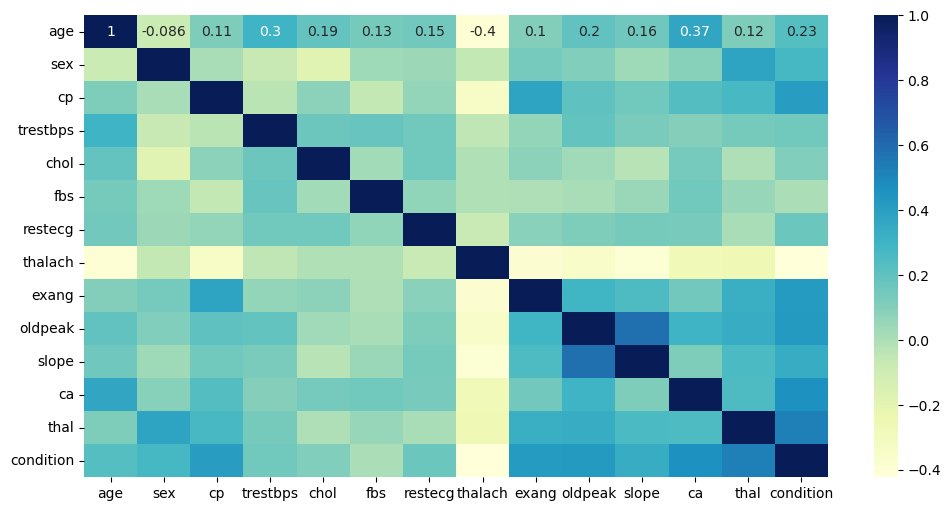

In [38]:
plt.figure(figsize = (12, 6))
sns.heatmap(data_uci_clear.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [61]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = data_uci_clear.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condicion de salud
Y = data_uci_clear['condition'] # Se cargan los datos de train con los datos de la coondición de salud

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [62]:
# Verificamos la distribución de clases en Y_train y Y_test
print("Distribución de clases en Y_train:")
print(Y_train.value_counts())
print("\nDistribución de clases en Y_test:")
print(Y_test.value_counts())

Distribución de clases en Y_train:
condition
0    119
1    103
Name: count, dtype: int64

Distribución de clases en Y_test:
condition
0    40
1    34
Name: count, dtype: int64


In [63]:
# Construir el modelo de regresión logistica 
modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [64]:
print(Prediccion)

[0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1]


In [65]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.85      0.87        34

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



In [66]:
modelo_regresion.score(X_train,Y_train)

0.8513513513513513

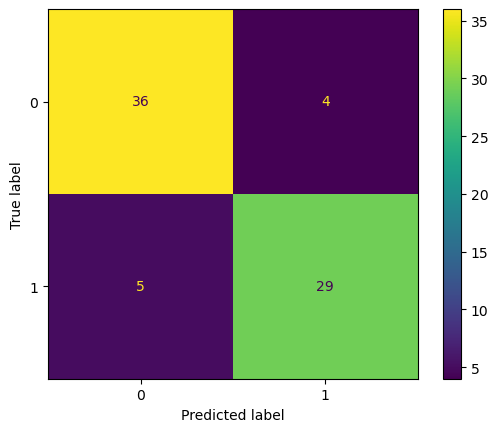

In [67]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

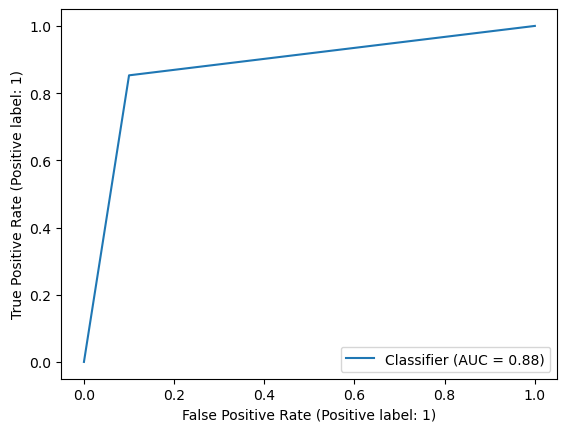

In [68]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()